#### Name: Shourya Merchant, Section: CSE-6, Roll: 22051280

## Building a Logistic Regression Model using Cancer Tumor Dataset

### Algorithm

Logistic regression is a supervised learning algorithm commonly applied to binary classification tasks, such as determining whether a patient has a medical condition based on diagnostic data.

- The algorithm predicts the outcome of a categorical dependent variable. The result is a discrete value, such as Yes/No, 0/1, or True/False.  
- Instead of giving exact values like 0 or 1, logistic regression predicts probabilities that fall between 0 and 1.  
- Unlike linear regression, logistic regression fits an "S"-shaped sigmoid function, which helps in classifying the data into one of two categories.

---

#### Libraries:
- **matplotlib**: Used for creating visualizations to analyze patterns and results.  
- **pandas**: Provides tools for handling and preprocessing datasets.  
- **numpy**: Supports numerical operations and array manipulation.  
- **scikit-learn**: Offers tools for building and evaluating logistic regression models.  
- **seaborn**: Aids in creating insightful statistical data visualizations.  



In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

### Importing the Breast Cancer Dataset

In [23]:
data = pd.read_csv("./datasets/Cancer_Data.csv")

### Importing Libraries

### Inspecting the Dataset

In [24]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


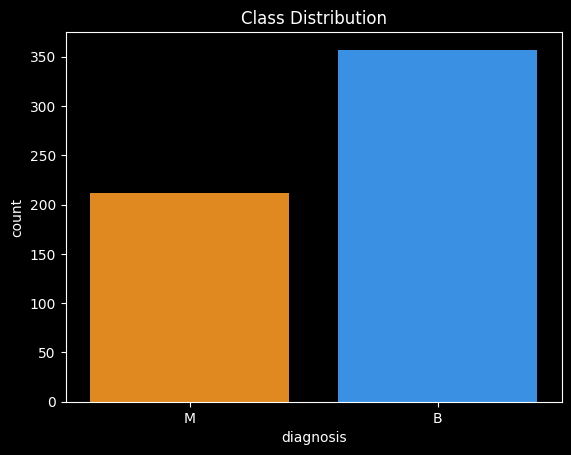

In [25]:
# Dropping the 'id' column and any unrelated columns like 'Unnamed: 32' since these control predictions
data = data.drop(columns=['id', 'Unnamed: 32'], axis=1)

plt.style.use('dark_background')

# Distribution of target classes (Malignant/Tumor)
sns.countplot(x='diagnosis', data=data, hue='diagnosis', palette=['darkorange', 'dodgerblue'])
plt.title("Class Distribution")
plt.show()

# Mapping target variable (B = 0, M = 1)
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

### Feature Selection via Correlation Heatmap

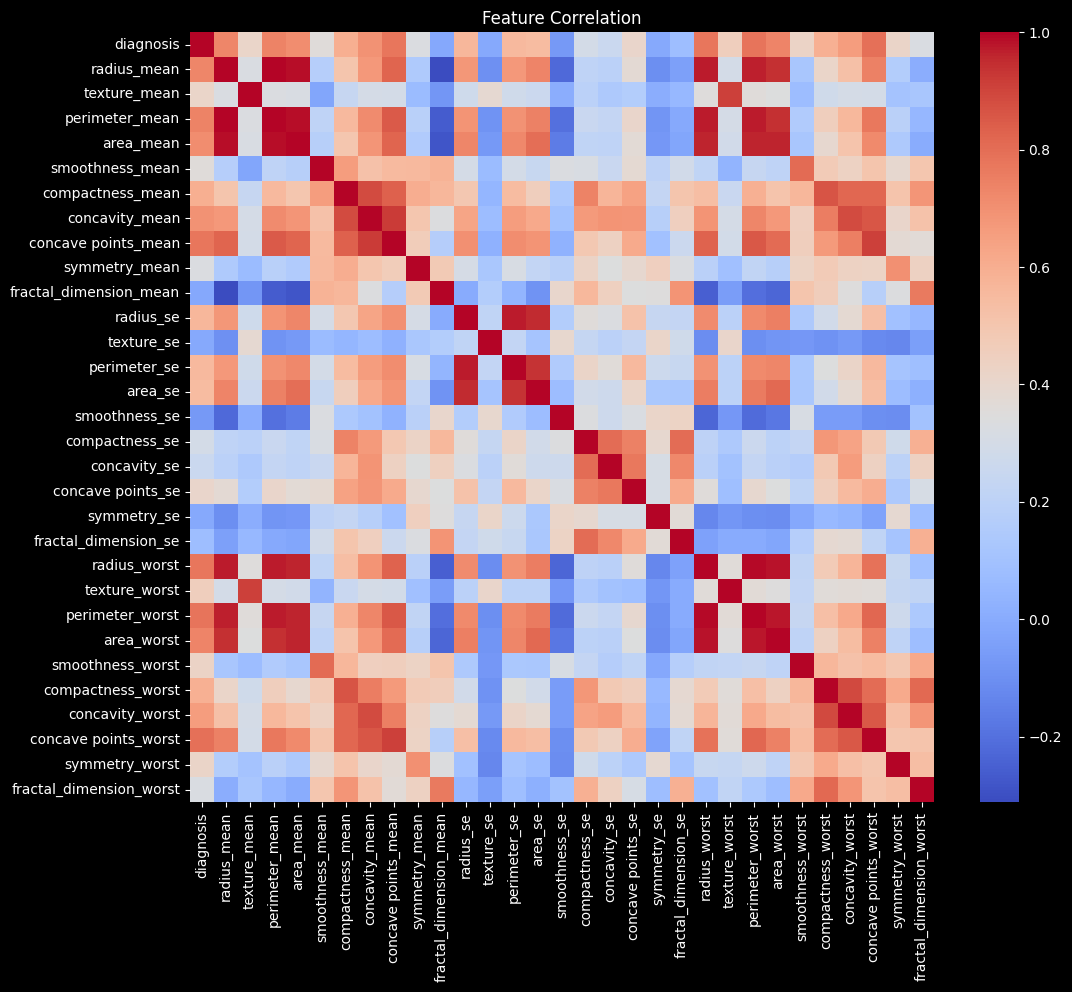

Selected Features: ['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [26]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Selecting features to build regression model based on correlation (> 0.5)
cor_target = abs(correlation_matrix['diagnosis'])
relevant_features = cor_target[cor_target > 0.5].index

print("Selected Features:", relevant_features.tolist())

data = data[relevant_features]

### Data Preprocessing

In [27]:
# Splitting features and target variable
X = data.drop(columns=['diagnosis'], axis=1)
y = data['diagnosis']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building the Logistic Regression Model

In [28]:
# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

### Model Evaluation

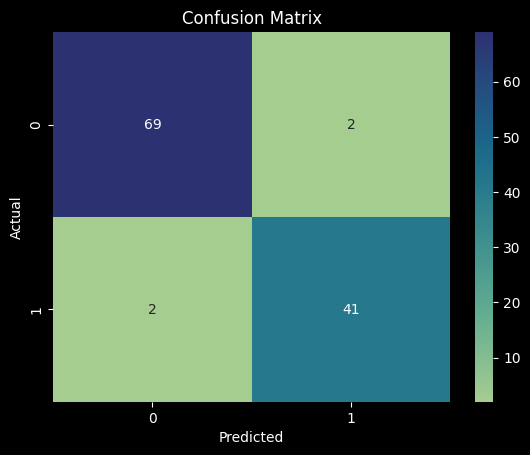

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.96


In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

### Visualizing Data and Decision Boundary using PCA Projection

PCA selects the principal components (linear combinations of features) that capture the most variance in the dataset, ensuring the visualization reflects the underlying structure better. It avoids potential biases introduced by arbitrarily selecting specific features for plotting.

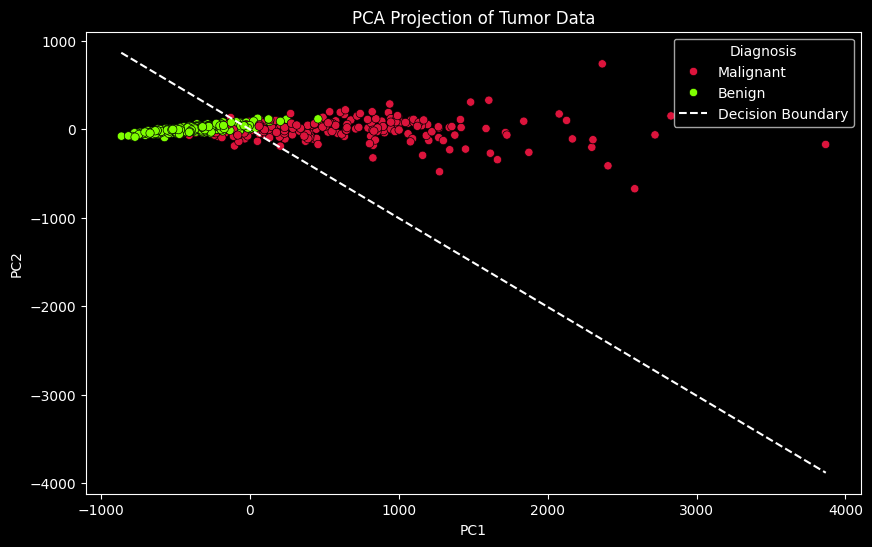

Random Test Sample Prediction: Malignant
Actual Class: Malignant


In [30]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA components to a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = y.map({0: 'Benign', 1: 'Malignant'})

# Plotting the data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, palette=['crimson', 'chartreuse'], edgecolor='black')

# Decision boundary line calculation
coef = model.coef_[0]
intercept = model.intercept_[0]

# Transforming coefficients to the PCA space
decision_slope = -(coef[0] / coef[1])
decision_intercept = -(intercept / coef[1])

# Generating line points
x_vals = np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 100)
y_vals = decision_slope * x_vals + decision_intercept
plt.plot(x_vals, y_vals, color='white', linestyle='--', label='Decision Boundary')
plt.title("PCA Projection of Tumor Data")
plt.legend(title="Diagnosis", loc="upper right")
plt.grid(False)
plt.show()

# Predicting a random sample from the test set
random_idx = np.random.randint(0, X_test.shape[0])
sample = X_test[random_idx].reshape(1, -1)
prediction = model.predict(sample)[0]
actual = y_test.iloc[random_idx]

print(f"Random Test Sample Prediction: {'Malignant' if prediction == 1 else 'Benign'}")
print(f"Actual Class: {'Malignant' if actual == 1 else 'Benign'}")

### K-Fold Cross Validation for Model Performance

In [31]:
# Define the K-Fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize arrays to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform K-Fold Cross Validation
for train_idx, val_idx in kfold.split(X, y):
    # Splitting the data
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Standardizing the features
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)

    # Training the model
    model.fit(X_train_fold, y_train_fold)

    # Predictions
    y_val_pred = model.predict(X_val_fold)

    # Metrics
    accuracies.append(accuracy_score(y_val_fold, y_val_pred))
    precisions.append(precision_score(y_val_fold, y_val_pred))
    recalls.append(recall_score(y_val_fold, y_val_pred))
    f1_scores.append(f1_score(y_val_fold, y_val_pred))

# Displaying Average Metrics
print("K-Fold Cross Validation Results:")
print(f"Average Accuracy: {np.mean(accuracies):.2f}")
print(f"Average Precision: {np.mean(precisions):.2f}")
print(f"Average Recall: {np.mean(recalls):.2f}")
print(f"Average F1-Score: {np.mean(f1_scores):.2f}")

K-Fold Cross Validation Results:
Average Accuracy: 0.95
Average Precision: 0.94
Average Recall: 0.92
Average F1-Score: 0.93
